In [66]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import warnings
warnings.filterwarnings("ignore")

#  Load Dataset
df = pd.read_csv("student_gpa_dataset.csv")

#  Display First Few Rows
print(df.head())



   StudentID  Gender  StudyHours  AttendanceRate ExtraActivities  \
0          1    Male          17              93             Yes   
1          2  Female          11              73              No   
2          3    Male           1              64              No   
3          4    Male           9              81              No   
4          5    Male           3              81              No   

   PreviousGrades   GPA  
0            2.38  3.08  
1            2.54  3.37  
2            2.97  3.23  
3            2.75  3.89  
4            2.79  3.89  


In [68]:
#  Check for Missing Values
print("\nMissing Values:\n", df.isnull().sum())

#  Encode Categorical Columns (Gender, ExtraActivities)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male=1, Female=0
df['ExtraActivities'] = label_encoder.fit_transform(df['ExtraActivities'])  # Yes=1, No=0

#  Features and Target
X = df.drop(columns=['StudentID', 'GPA'])  # Features
y = df['GPA']                              # Target

#  Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




Missing Values:
 StudentID          0
Gender             0
StudyHours         0
AttendanceRate     0
ExtraActivities    0
PreviousGrades     0
GPA                0
dtype: int64


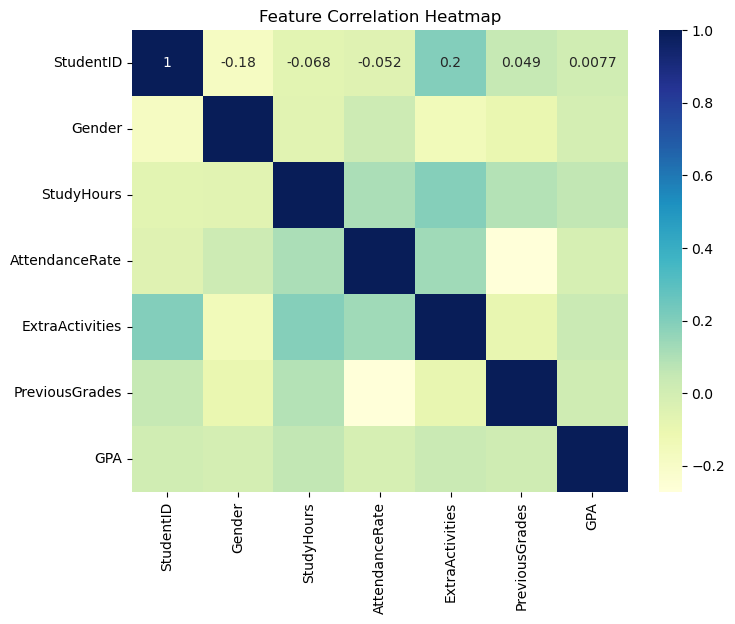

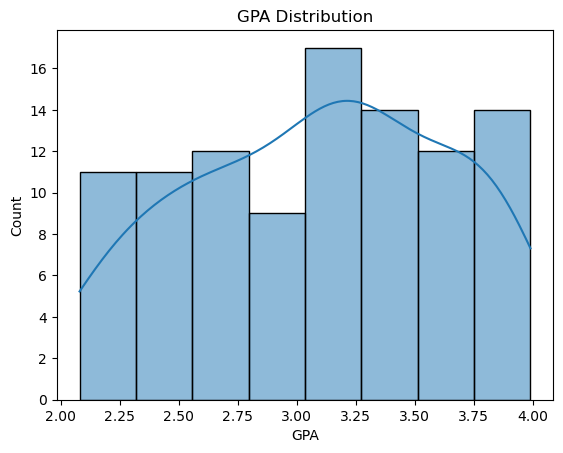

In [70]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")
plt.show()

#  GPA Distribution
sns.histplot(df['GPA'], kde=True)
plt.title("GPA Distribution")
plt.show()



In [72]:
# Initialize Regression Models
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "SGD Regressor": SGDRegressor(),
    "MLP Regressor": MLPRegressor(max_iter=500),
    "Decision Tree": DecisionTreeRegressor()
}

#  Store Evaluation Metrics
results = {}

#  Train and Evaluate Each Model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse}

    print(f"\n📌 {name}")
    print(f"MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}")




📌 Linear Regression
MAE: 0.517, MSE: 0.360, RMSE: 0.600

📌 SVR
MAE: 0.513, MSE: 0.349, RMSE: 0.591

📌 SGD Regressor
MAE: 0.506, MSE: 0.349, RMSE: 0.590

📌 MLP Regressor
MAE: 0.547, MSE: 0.384, RMSE: 0.619

📌 Decision Tree
MAE: 0.749, MSE: 0.839, RMSE: 0.916



📋 Model Comparison:
                         MAE       MSE      RMSE
Linear Regression  0.516800  0.360149  0.600124
SVR                0.512962  0.348963  0.590731
SGD Regressor      0.505779  0.348648  0.590464
MLP Regressor      0.546770  0.383757  0.619481
Decision Tree      0.749500  0.838555  0.915726


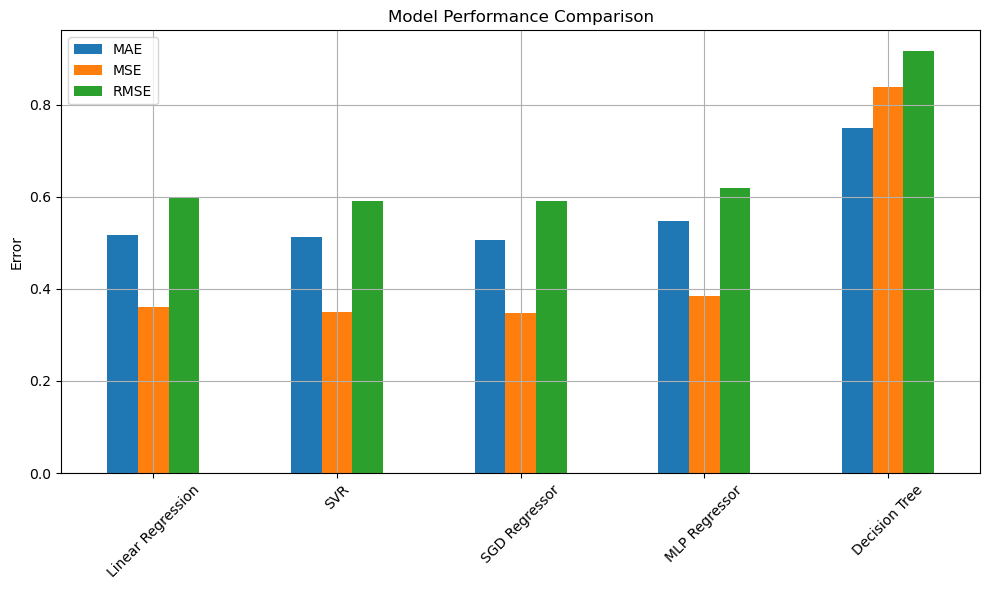

In [74]:
#  Convert Results to DataFrame
results_df = pd.DataFrame(results).T

#  Print Results Table
print("\n📋 Model Comparison:\n", results_df)

#  Plot MAE, MSE, RMSE for All Models
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Error")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# In Shahzaib_Assignment_Project_3, we analyzed student academic performance data to predict GPA using various regression models including Linear Regression, SVR, SGD, MLP, and Decision Tree. After preprocessing and evaluation using MAE, MSE, and RMSE, the model with the lowest RMSE was considered the best predictor of GPA.